## Introduction:
##### This cancer dataset consists of 569 rows and 31 columns, with each feature represented as a float data type. The dataset is typically used for classification tasks, aiming to diagnose whether a tumor is malignant or benign based on various features extracted from cell nuclei. The features include measurements like radius, texture, perimeter, and smoothness, providing essential information for accurate diagnosis. The goal is to build a model that can effectively predict cancer diagnoses using these numerical attributes.

#### IMPORTING RELEVANT LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Getting dataset from file/folder

In [5]:
df = pd.read_csv('cancer-data-2.csv')

## Exploratory Data Analysis (EDA)

In [7]:
df.head() # This shows the first 5 rows and 31 columns of the datasets.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.tail() # This shows the last 5 rows and 31 columns of the datasets.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [9]:
df.info() # This shows the information on the datasets and also showing if they are null values on the datasets.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
# Checking the shape of the Datasets helps us to know how many rows and columns are presents in the entier datasets.
df.shape

(569, 31)

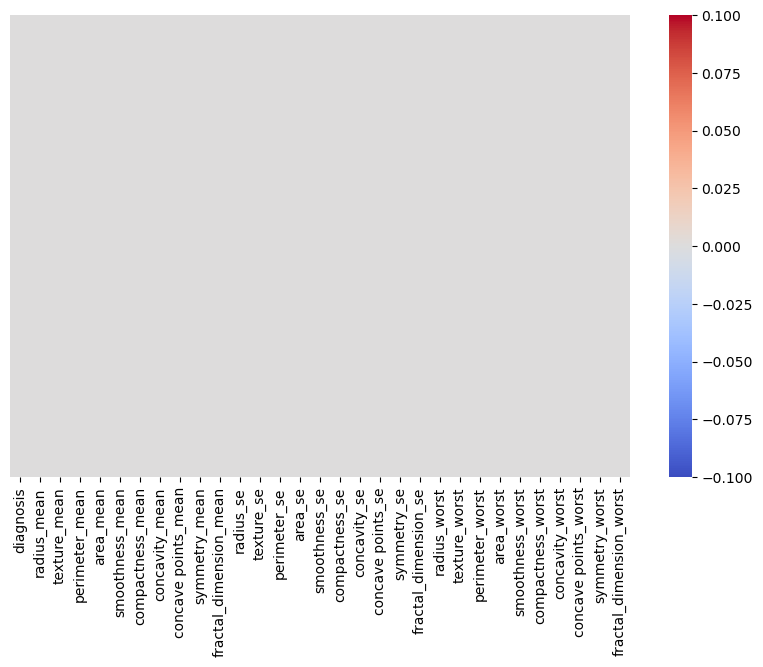

In [11]:
# Custom Heatmap Design:
## Generally, heatmap provide a clear visual representation of realationships within data.

plt.figure(figsize=(10,6))  # Adjusting the figure size
sns.heatmap(df.isna(), 
            yticklabels=False, 
            cbar=True,  # Show color bar
            cmap='coolwarm')
plt.show()

In [12]:
df.dtypes # This shows the types of data represented by the datasets, eg, int, float,category,objects.

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [13]:
df.describe() # This function in pandas is called the discriptive statistics function, it provide summary key statistical metrics for numerical columns.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Correlation Interpretation with Heatmap 

In [15]:
df.corr() # getting correlation among variables.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<Axes: >

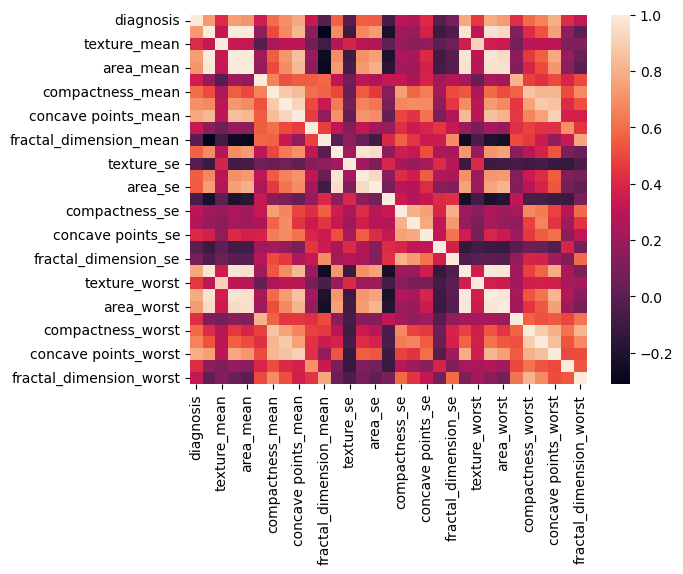

In [16]:
#Visualizing correlation with heatmap
sns.heatmap(df.corr())

### Identifinying missing values

In [18]:
## Importing missingno as msno to Visualize Missing Data

!pip install missingno

In [19]:
import missingno as msno

C:\Users\hp\anaconda3\Lib\site-packages\scipy\cluster\hierarchy.py:2821: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Axes: >

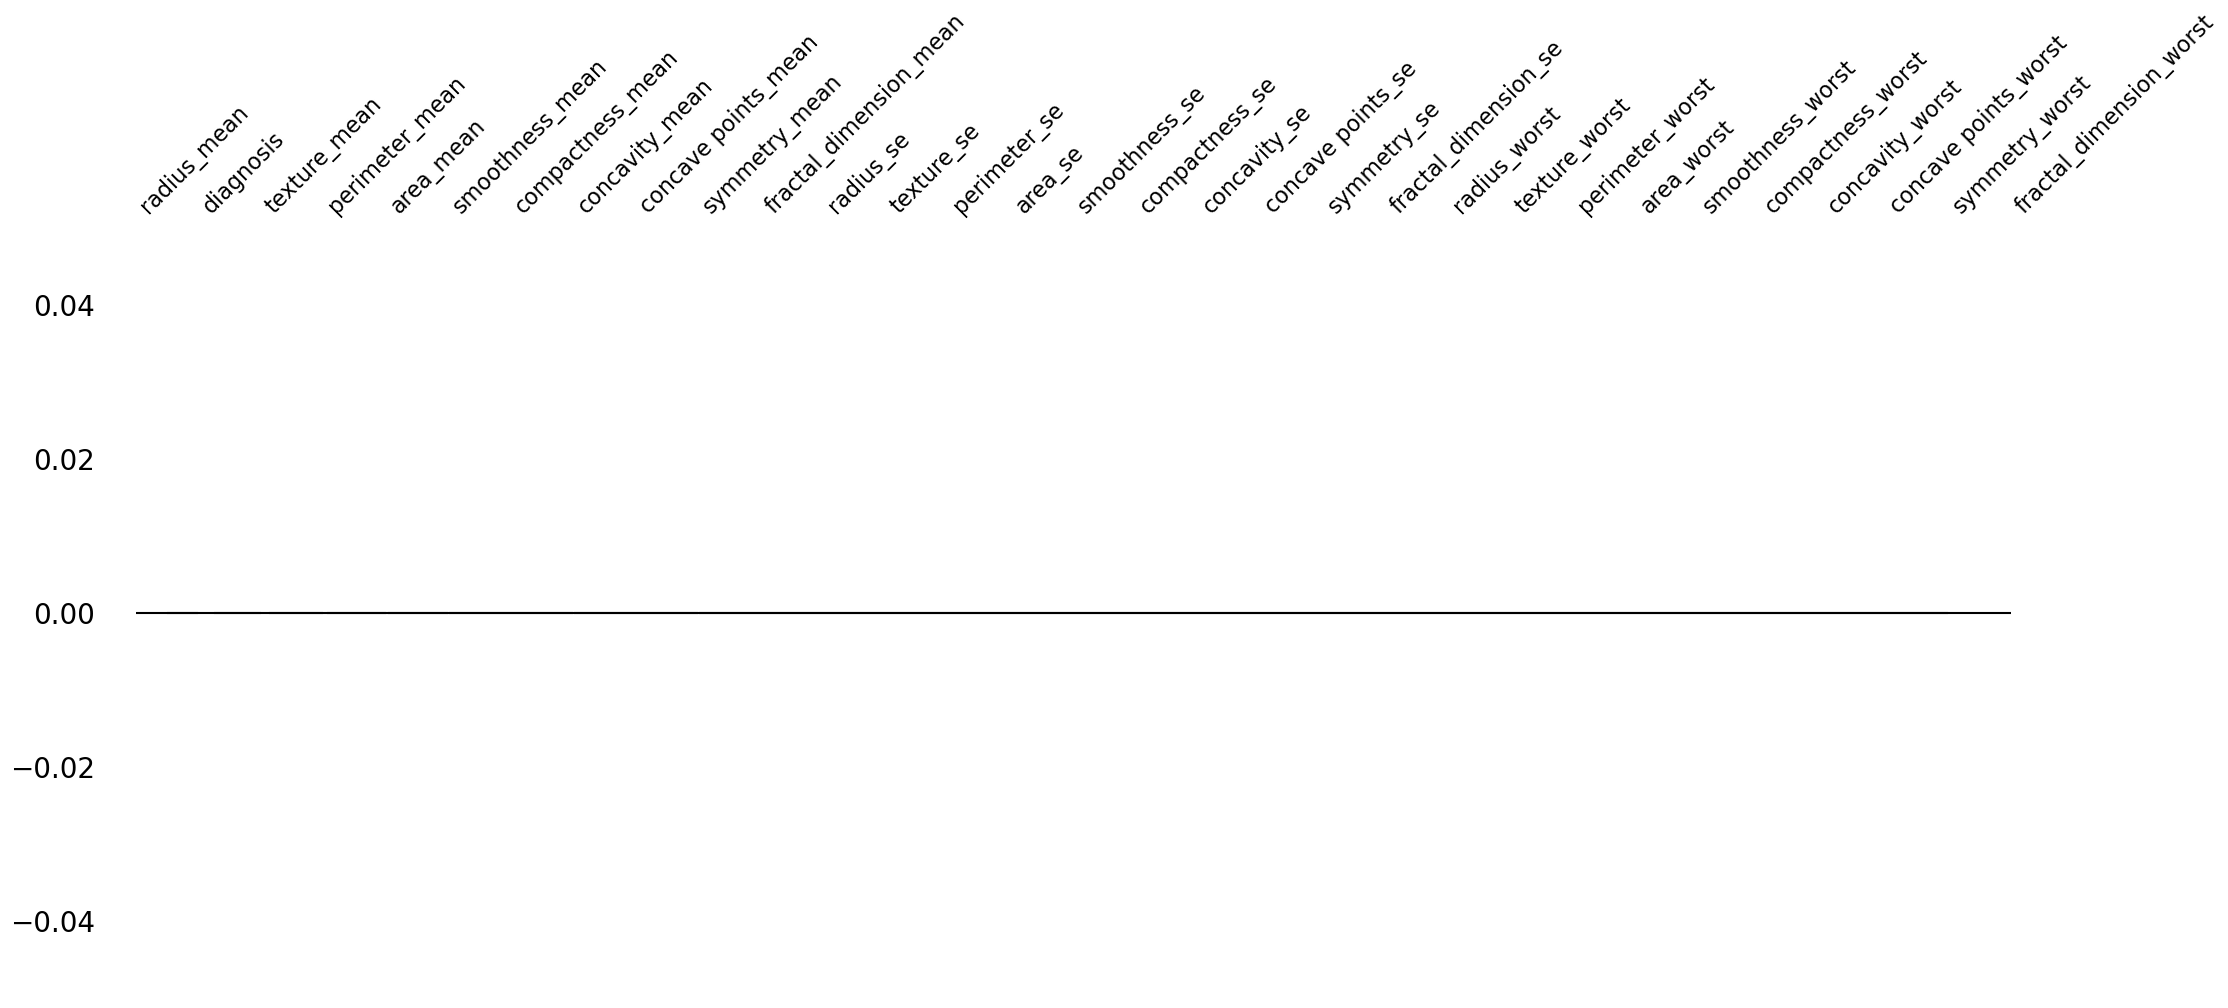

In [20]:
msno .dendrogram(df)

In [21]:
## Checking the data for missing value in all positions and it shows that the data has no missing values.

missing_values =df.isnull().sum()
columns_with_missing_values = [col for col in df.columns if missing_values[col] >0]
print(f"Columns with missing values:{len(columns_with_missing_values)}")

Columns with missing values:0


In [22]:
df.isna().sum() #this data has no missing value

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [23]:
# Getting value counts for each column
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
print('\n')

Value counts for diagnosis:
diagnosis
0    357
1    212
Name: count, dtype: int64
Value counts for radius_mean:
radius_mean
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: count, Length: 456, dtype: int64
Value counts for texture_mean:
texture_mean
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: count, Length: 479, dtype: int64
Value counts for perimeter_mean:
perimeter_mean
82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: count, Length: 522, dtype: int64
Value counts for area_mean:
area_mean
512.2     3
1075.0    2
582.7     2
399.8     2
641.2     2
         ..
507.4     1
609.9     1
463.7     1
428.9     1
181.0     1
Name: count, Length: 539, dtype: int64
Value counts for smoothness_mean:
smoothness_mean
0.10070    5
0.11500    4
0.10540 

## Managing Outliers

In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

diagnosis                    1.000000
radius_mean                  4.080000
texture_mean                 5.630000
perimeter_mean              28.930000
area_mean                  362.400000
smoothness_mean              0.018930
compactness_mean             0.065480
concavity_mean               0.101140
concave points_mean          0.053690
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
radius_se                    0.246500
texture_se                   0.640100
perimeter_se                 1.751000
area_se                     27.340000
smoothness_se                0.002977
compactness_se               0.019370
concavity_se                 0.026960
concave points_se            0.007072
symmetry_se                  0.008320
fractal_dimension_se         0.002310
radius_worst                 5.780000
texture_worst                8.640000
perimeter_worst             41.290000
area_worst                 568.700000
smoothness_worst             0.029400
compactness_

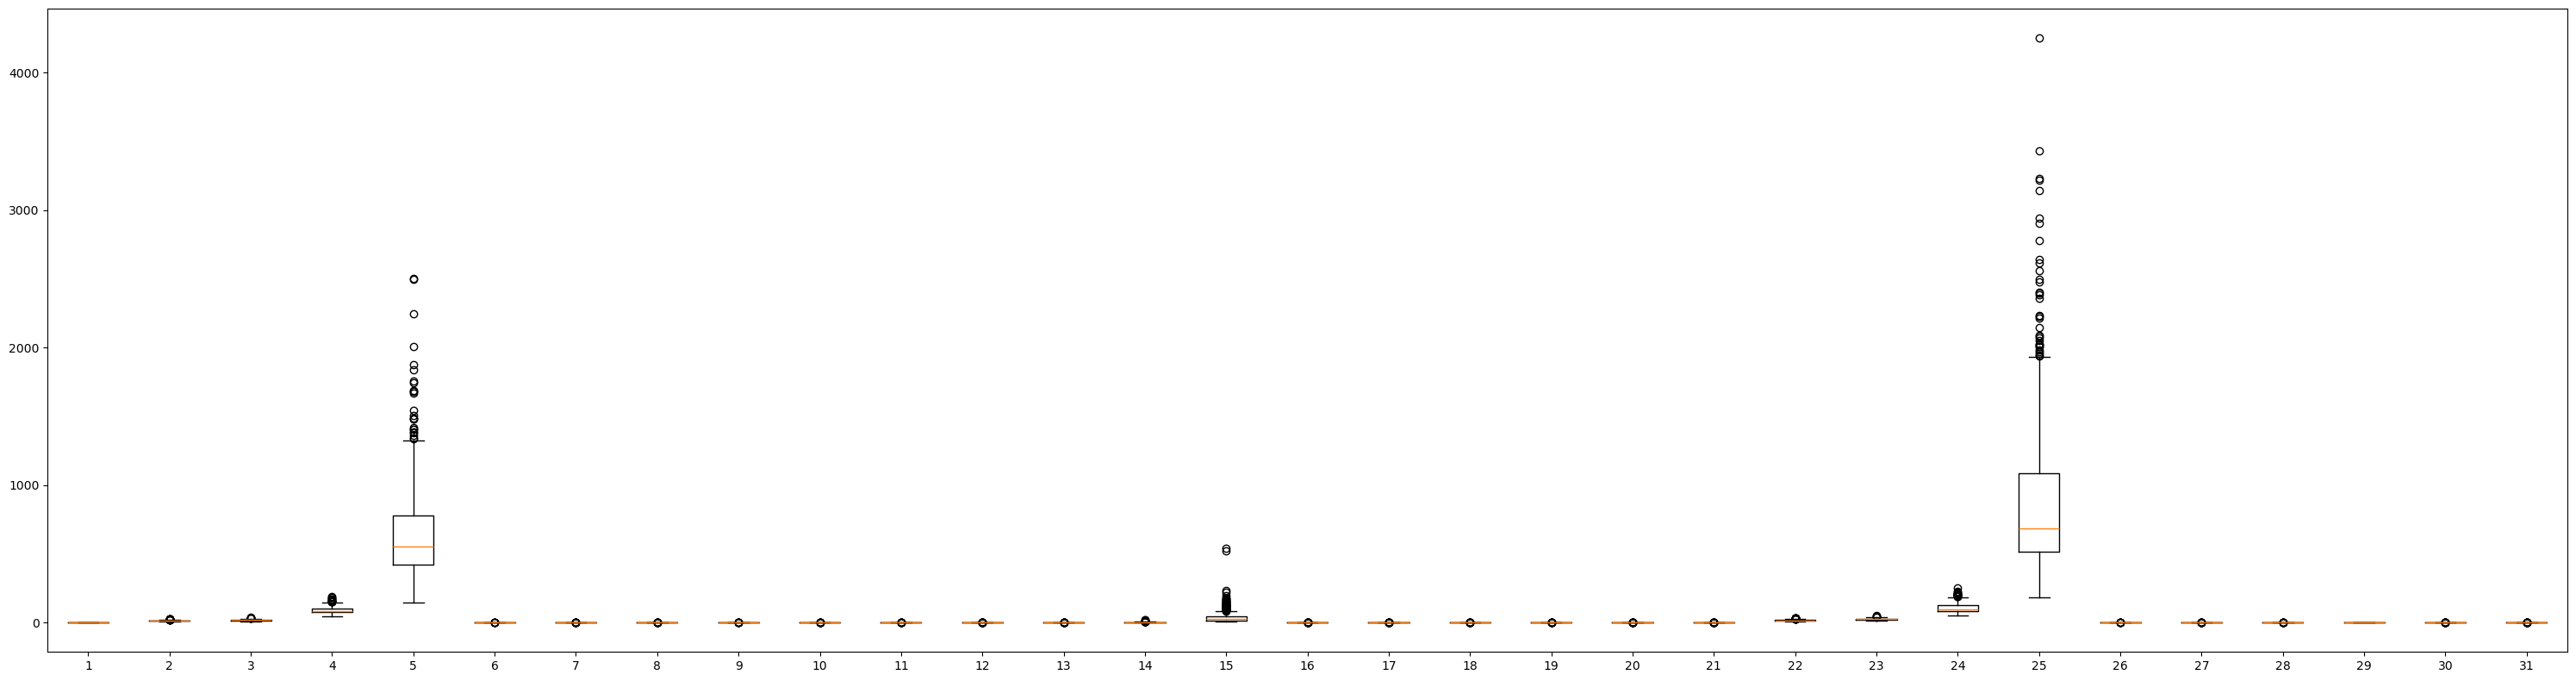

In [26]:
###checking the Data for Possible Outliers

plt.figure(figsize=(30,8))
plt.boxplot(df)
plt.tight_layout()
plt.show()

In [27]:
all_columns = df.columns.to_list()

In [28]:
df_boxplot = pd.DataFrame()
list_for_boxplot =  [3,4,14,23,24]
for item in list_for_boxplot:
    df_boxplot[df.columns[item]] = df[df.columns[item]]

df_boxplot

,perimeter_mean,area_mean,area_se,perimeter_worst,area_worst
0,122.80,1001.0,153.40,184.60,2019.0
1,132.90,1326.0,74.08,158.80,1956.0
2,130.00,1203.0,94.03,152.50,1709.0
3,77.58,386.1,27.23,98.87,567.7
4,135.10,1297.0,94.44,152.20,1575.0
...,...,...,...,...,...
564,142.00,1479.0,158.70,166.10,2027.0
565,131.20,1261.0,99.04,155.00,1731.0
566,108.30,858.1,48.55,126.70,1124.0
567,140.10,1265.0,86.22,184.60,1821.0


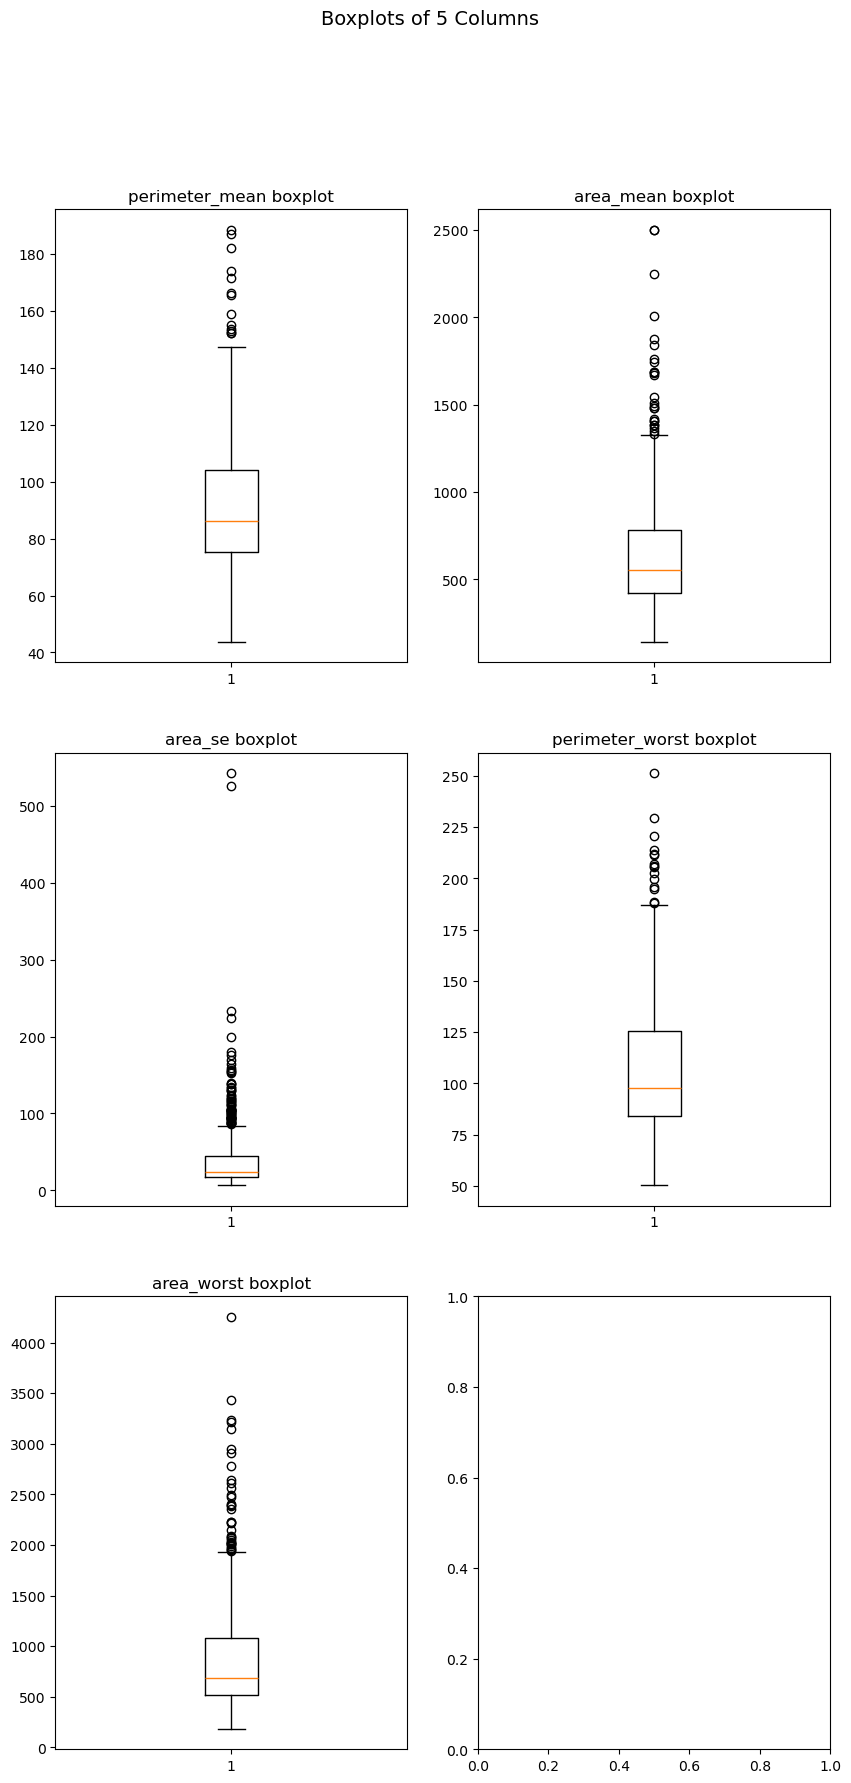

In [29]:
fig, axs = plt.subplots(3, 2, figsize=(10,20))
fig.suptitle('Boxplots of 5 Columns', fontsize=14)

axs = axs.flatten()
for i, (data,series) in enumerate(df_boxplot.items()):
    axs[i].boxplot(series)
    axs[i].set_title(f'{data} boxplot')
plt.show()

## DATA PREPROCESSING 
### Spliting Datasets into Target and predictable variables X and Y

In [31]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [32]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [33]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


## Splitting the data into training and testing datasets

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [36]:
#Splitting dataset by 80% training dataset and 20%testing dataset using train_test_split function 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


## LOGISTICSREGRESSION

In [39]:
logisticsmodel =LogisticRegression()
logisticsmodel.fit(X_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
logisticsmodel.score(X_test, y_test)

0.9473684210526315

In [41]:
print (logisticsmodel.intercept_)

[-0.20856946]


In [42]:
print(logisticsmodel.coef_)

[[-1.07953275 -0.45806869 -0.10244665  0.00281344  0.03809814  0.18655398
   0.26652369  0.11309715  0.06391514  0.01021202 -0.05176179 -0.36593882
  -0.18119482  0.123566    0.00292934  0.04081795  0.05452675  0.01446012
   0.0169676   0.00408279 -1.16320755  0.49597133  0.150719    0.02223166
   0.06764381  0.56373094  0.71751255  0.20735187  0.19445989  0.05611931]]


In [43]:
## Making prediction with X_test dataset using confusion matrix
predictions =logisticsmodel.predict(X_test)

## Confusion Matrix 

In [45]:
## classification report using confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [47]:
## PRINTING CONFUSION MATRIX Y TEST PREDICTION
print(confusion_matrix(y_test, predictions))

[[69  3]
 [ 3 39]]


# K Nearest Neighbor (KNN)

In [49]:
# Importing Libraries for (KNN)
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors= 1)

In [51]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [52]:
# testing the model
knn_predict = knn.predict(X_test)

In [53]:
knn.score(X_test, y_test)

0.956140350877193

In [54]:
knn_predict = knn.predict(X_test)

In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [56]:
print(confusion_matrix(y_test, knn_predict))

[[72  0]
 [ 5 37]]


In [57]:
compare_test_pred = pd.DataFrame({
    "Actual": y_test,
    "Predicted": knn_predict
})
print(compare_test_pred,'\n')


     Actual  Predicted
107       0          0
437       0          0
195       0          0
141       1          1
319       0          0
..      ...        ...
19        0          0
313       0          0
139       0          0
495       0          0
317       1          1

[114 rows x 2 columns] 



In [58]:
#Suming up correct and wrong predictions
compare_test_pred['Correct'] = compare_test_pred['Actual'] == compare_test_pred['Predicted']

correct_predictions = compare_test_pred['Correct'].sum()
wrong_predictions = len(compare_test_pred) - correct_predictions
print(f"correct predictions:{correct_predictions}")
print(f"Wrong predictions: {wrong_predictions}")

correct predictions:109
Wrong predictions: 5


In [59]:
#Calculating error rate and checking for best k value by iterating 30 possible values
error_rate = []

for i in range(1,30):
    #create and train KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    #make predictions on test set
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))

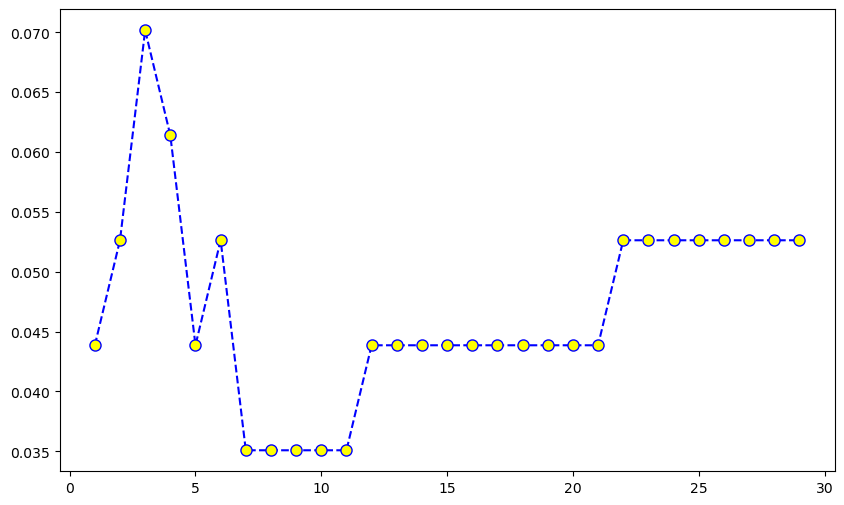

In [60]:
#Ploting chart to see best k value
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, color='blue',linestyle ='dashed', 
       marker='o', markerfacecolor='yellow',markersize=8)

## Evaluation on KNN Model using Elbow Method
### Accuracy of the Model remained the same at 0.96 or 96%

In [62]:
# Best K value is between 7 and 11
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knn_new_pred = knn.predict(X_test)

print(confusion_matrix(y_test,knn_new_pred))
print('\n')
print(classification_report(y_test,knn_new_pred))

[[72  0]
 [ 4 38]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



## GridsearchCV
##### GridSearchCV is a powerful tool in machine learning that helps automate the process of tuning hyperparameters for a model. It performs an exhaustive search over a specified parameter grid, testing each possible combination to find the optimal set of hyperparameters that maximize model performance.

##### By using cross-validation, GridSearchCV ensures that the model is evaluated on different subsets of the data, which helps in achieving a more robust and generalizable model.

In [64]:
# Import relevance libraries
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [65]:
models = []
scores = []

In [66]:
#Transforming training and testing data
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [67]:
params1 = {'penalty':['l1','l2'], 
         'solver': ['liblinear', 'saga']}
logistics1 = LogisticRegression(random_state=42)


grid = GridSearchCV(logistics1, params1, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [68]:
# Evaluate the results
print("Best parameters:",grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

models.append(logistics1)
scores.append(grid.best_score_)

Best parameters: {'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.9716425120772947


In [69]:
#  making predictions on the test sets.

y_pred = grid.predict(X_test_scaled)

In [70]:
# Getting the accuracy of the reports
print("Accuracy Report:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

Accuracy Report: 0.9824561403508771

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



###### Comments: GridSearch.CV model is accurate with an overall accuracy of 98.25%.
###### The model performs well excellently well and the result indicates that the model is reliable and acuurate.


### GridSearchCV - DecisionTreeClassifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
params2 = {'criterion':['gini', 'entropy'],
          'splitter':['best', 'random']
          }
logistics2 = DecisionTreeClassifier()
grid2 = GridSearchCV(logistics2,params2, cv = 10)
grid2.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [75]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(logistics2)
scores.append(grid2.best_score_)

{'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(penalty='l1', random_state=42, solver='liblinear')
0.9716425120772947


## GridSearchCV- Support Vector Classifier(SVC)

In [77]:
from sklearn.svm import SVC

In [78]:
params3 = {'C':[0.01, 0.05],
           'degree':[2,3],
           'gamma':[0.001, 0.01],
           'kernel': ['rbf']
}
logistics3 = SVC()
grid3 = GridSearchCV(logistics3,params3, cv= 10)
grid3.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.05], 'degree': [2, 3],
                         'gamma': [0.001, 0.01], 'kernel': ['rbf']})

In [79]:
print(grid3.best_params_)
print(grid3.best_estimator_)
print(grid3.best_score_)


models.append(logistics3) 
scores.append(grid3.best_score_)

{'C': 0.05, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.05, degree=2, gamma=0.01)
0.938743961352657


## GridsearchCV KNeigbors Classifier(KNN)

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
params4 = {'n_neighbors': range(30),
           'metric':['manhattan','euclidean']  
}

logistics4 = KNeighborsClassifier()
grid4 = GridSearchCV(logistics4, params4, cv=10)
grid4.fit(X_train_scaled,y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': range(0, 30)})

In [83]:
print(grid4.best_params_)
print(grid4.best_estimator_)
print(grid4.best_score_)


models.append(logistics4) 
scores.append(grid4.best_score_)

{'metric': 'manhattan', 'n_neighbors': 2}
KNeighborsClassifier(metric='manhattan', n_neighbors=2)
0.9694685990338165


## GridSearchCV-RandomForestClassifier

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
params5 = {
    'n_estimators': range(20),
    'criterion': ['gini', 'entropy']}
logistics5 = RandomForestClassifier()
grid5 = GridSearchCV(logistics5, params5, cv=10)
grid5.fit(X_train_scaled,y_train)

In [ ]:
print(grid5.best_params_)
print(grid5.best_estimator_)
print(grid5.best_score_)

#Appending to models and scores list 
models.append(logistics5) 
scores.append(grid.best_score_)

In [ ]:
result_data=pd.DataFrame({"models":models,"score":scores})

In [ ]:
result_data

## COMMENTS:
##### All models performed well, with accuracies above 93%.
##### The Random Forest Classifier outperformed the other models owing to its  ensemble nature and ability to handle complex relationships in data.

##### The K-Nearest Neighbors classifier also performed very well.

##### The Decision Tree Classifier and SVC, while still performing well, had lower accuracies compared to the RFC and KNN models.

##### These results suggest that for this classification problem, ensemble methods (Random Forest) and instance-based learning (KNN) were particularly effective. However, the high performance across all models indicates that the problem might be relatively straightforward to classify, or that the features are highly informative.

## Conclusions

#### Using GridSearchCV for hyperparameter tuning, both K-Nearest Neighbors (KNN) and Random Forest classifiers performed well on the dataset. The Elbow Method helped identify the optimal number of neighbors for KNN, ensuring a balanced model. Random Forest, with its ability to handle complex data, slightly outperformed KNN in terms of accuracy. Overall, both models showed strong, reliable performance, with GridSearchCV ensuring optimal results through cross-validation.
#### The best model for this classification problem can be either the KNN Model (using the elbow method) or the KNeigbors Classifier or the Random Forest Classifier. 

<h3 style='color:red'> # Comments </h3>
    <h4 style='color:red'> 1)Task 3 (20 marks)  </h4> 
<h5 style='color:blue'> 
<br>---Learner has correctly identified the target variable and the feature sets. </br>
<br>---Learner has split the data into train test data correctly.</br>
<br>---Learner has rightly built the classification model using the training data. </br>
<br>---Learner has tested the model on test data too.</br>
<br>---Learner has also printed the classification report and confusion matrix.</br>
<br>---Learner has provided relevant comments at relevant places.</br>
</h5>
<h5 style='color:green'>                                   
    <u> Marks scored:20 </u><br/>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------    
</h5>    
 
<h3 style='color:red'> # Comments </h3>
    <h4 style='color:red'> 2)Task 4 (10 marks)  </h4> 
<h5 style='color:blue'>                                                                                
<br>---Learner has provided the code to build Random Forest classification model and applied GridSearchCV for hyperparameter tuning.</br>
<br>---Correctly displayed the results. </br>
<br>---Learner has provided relevant comments at relevant places. </br>
                           
<h5 style='color:green'>                                   
<u> Marks scored:10 </u><br/>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------    
</h5> 
</h5> 

    
<h3 style='color:red'> # Comments </h3>
    <h4 style='color:red'> Overall Comments and Total Marks:</h4>
    
<h5 style='color:blue'>                                                                                
---Well-done! Your attention to the details and understanding of the code is much appreciated. <br>
---Keep up the good work and keep practicing. Happy coding!  </br>
<h5 style='color:green'>                                   
<u> Total Marks scored:59 </u><br/>
------------------------------------------------------------------------------------------------------------------------------------------------------------------    
</h5> 